# Lab 3 - BVPs

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

### Problem 1

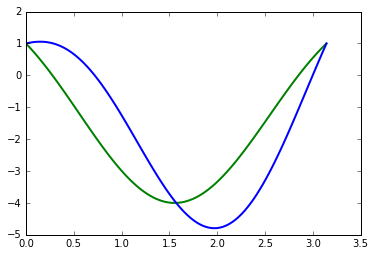

In [2]:
# y'' +4y = -9sin(x), y(0) = 1., y(3*pi/4.) = -(1.+3*sqrt(2))/2., y'(0) = -2
# Exact Solution: y(x) = cos(2x) + (1/2)sin(2x) - 3sin(x)

def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 0
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,t0]), [a,b],atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha,t1]), [a,b],atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print "t not found"
    return t2

def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol

def ode(y,x):
    return np.array([y[1], -4*y[0]-9*np.sin(x)])

X1 = np.linspace(0, np.pi, 100)
Y1 = solveSecant(ode,X1,0,np.pi,1,1,4,2,40)

X2 = np.linspace(0, np.pi, 100)
Y2 = solveSecant(ode,X2,0,np.pi,1,1,1,2,40)

plt.plot(X1,Y1,'-g',linewidth=2)
plt.plot(X2,Y2,'-b',linewidth=2)
plt.show()

### Problem 2

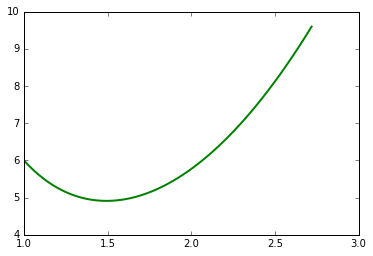

In [3]:
def find_t_newton(f,a,b,alpha,beta,t0,maxI):
    sol1 = np.inf
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol = odeint(f, np.array([alpha,t0,0,1]), [a,b], atol=1e-10)
        sol1 = sol[1,0]
        sol2 = sol[1,2]
        t1 = t0 - (sol1 - beta)/sol2
        t0 = t1
        i = i+1
    if i == maxI:
        print "t not found"
    return t1

def solveNewton(f,X,a,b,alpha,beta,t0,maxI):
    t = find_t_newton(f,a,b,alpha,beta,t0,maxI)
    sol = odeint(f,np.array([alpha,t,0,1]),X,atol=1e-10)[:,0]
    return sol

def ode_newton(y,x):
    return np.array([y[1], 3 + 2.*y[0]/x**2, y[3], (2./x**2)*y[2]])

X = np.linspace(1, np.e, 100)
Y = solveNewton(ode_newton,X,1,np.e,6,np.e**2 + 6./np.e,0,10)

plt.plot(X,Y,'-g',linewidth=2)
plt.show()

### Problem 3

In [4]:
def find_t(f,a,b,alpha,beta,vel,t0,t1,maxI):
    sol1 = 1
    i = 0
    while abs(sol1 - beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,vel,t0]), [a,b],atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha,vel,t1]), [a,b],atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print "t not found"
    return t2

def solveSecant(f,X,a,b,alpha,beta,vel,t0,t1,maxI):
    t = find_t(f,a,b,alpha,beta,vel,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,vel,t]), X,atol=1e-10)[:,0]
    return sol

g = 9.8067
mu1 = 0.0003
mu2 = 0

def ode1(c,x):
    return np.array([np.tan(c[2]), (-g*np.sin(c[2])+mu1*c[1]**2)/(c[1]*np.cos(c[2])), -g/(c[1]**2)])

def ode2(c,x):
    return np.array([np.tan(c[2]), (-g*np.sin(c[2])+mu2*c[1]**2)/(c[1]*np.cos(c[2])), -g/(c[1]**2)])

X = np.linspace(0,195,100)

Y1 = solveSecant(ode1,X,0,195,0,0,45,4,5,100)
Y2 = solveSecant(ode2,X,0,195,0,0,45,4,5,100)

Y3 = solveSecant(ode1,X,0,195,0,0,45,np.pi/3,3,100)
Y4 = solveSecant(ode2,X,0,195,0,0,45,np.pi/3,3,100)

plt.plot(X,Y1,'b-')
plt.plot(X,Y2,'k-')
plt.plot(X,Y3,'b-')
plt.plot(X,Y4,'k-')
plt.legend([r'$\mu$ = 0.0003',r'$\mu$=0'])
plt.show()